In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('/content/drive/My Drive/ecommerce_data/Customers.csv')
print("Customers Data:")
print(customers.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
products = pd.read_csv('/content/drive/My Drive/ecommerce_data/Products.csv')
print("\nProducts Data:")
print(products.head())


Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
transactions = pd.read_csv('/content/drive/My Drive/ecommerce_data/Transactions.csv')
print("\nTransactions Data:")
print(transactions.head())


Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [8]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


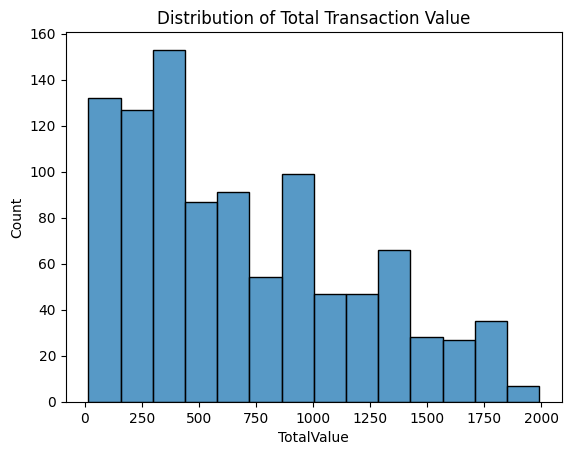

In [9]:
sns.histplot(transactions['TotalValue'])
plt.title('Distribution of Total Transaction Value')
plt.show()

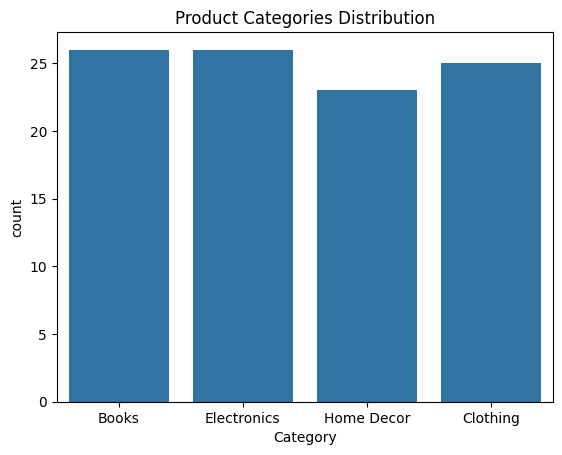

In [10]:
sns.countplot(x='Category', data=products)
plt.title('Product Categories Distribution')
plt.show()

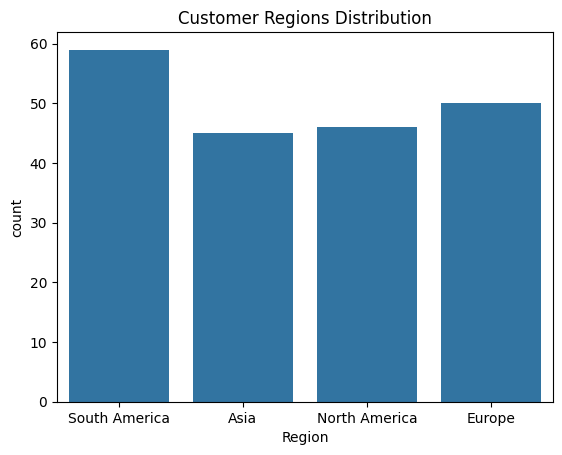

In [11]:
sns.countplot(x='Region', data=customers)
plt.title('Customer Regions Distribution')
plt.show()

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [13]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [18]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [22]:
features = data[['CustomerID', 'ProductID', 'TotalValue', 'Quantity', 'Price_x']]
print(features.head())

  CustomerID ProductID  TotalValue  Quantity  Price_x
0      C0199      P067      300.68         1   300.68
1      C0146      P067      300.68         1   300.68
2      C0127      P067      300.68         1   300.68
3      C0087      P067      601.36         2   300.68
4      C0070      P067      902.04         3   300.68


In [23]:
model = NearestNeighbors(n_neighbors=3)
model.fit(features[['TotalValue', 'Quantity', 'Price_x']])

NearestNeighbors(n_neighbors=3)

In [24]:
lookalikes = {}
for customer_id in customers['CustomerID'][:20]:
    customer_data = features[features['CustomerID'] == customer_id][['TotalValue', 'Quantity', 'Price_x']]
    distances, indices = model.kneighbors(customer_data)
    lookalikes[customer_id] = [(features.iloc[idx]['CustomerID'], dist) for idx, dist in zip(indices[0], distances[0])]

In [26]:
lookalikes_df = pd.DataFrame.from_dict(lookalikes, orient='index')
lookalikes_df.to_csv('FirstName_LastName_Lookalike.csv')